<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

### Image Classification & Machine learning based Medical Image Classification

Dataset - [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection)

#### Machine Learning - Hyperparameter Tuning (after increasing the sample size)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
# from google.colab.patches import cv2_imshow
import pandas as pd 
import os
from skimage.transform import resize
from skimage.io import imread

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc

In [5]:
df = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')

In [6]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [7]:
image = plt.imread('../input/histopathologic-cancer-detection/train/'+df['id'][1]+'.tif')

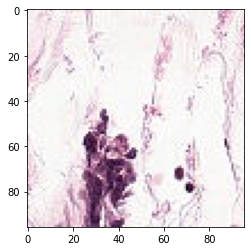

In [8]:
plt.imshow(image)

In [9]:
df.shape[0]

220025

In [10]:
# equalizing the contribution of both classes
dfnew = pd.concat([df[df.label==0].sample(n=1500),df[df.label==1].sample(n=1500)]) # 3000 samples and reducing the effect of class imbalance by taking equal number of random samples from both classes.

In [11]:
# taking a subset of the dataset due to memory error
# dfnew = df.sample(n=3000)

In [12]:
dfnew['label'].value_counts()

0    1500
1    1500
Name: label, dtype: int64

In [13]:
dfnew.reset_index(drop = True, inplace = True)

In [14]:
dfnew.tail()

,id,label
2995,7ba253793f308f55f1ae2dfff9875edc18c10533,1
2996,e08736869a9f18a2e4bcb982ec24d9bb397f02e7,1
2997,03be8550962501b38865837fda6a0a13ffd0fd87,1
2998,61c6b158914cdbbe669dc8616bad9c52757cbf0d,1
2999,2cb6244d1087eb6cb5ea7ce4a6caefe5c8f1a68c,1


In [15]:
flat_data_arr = [] #input array
target_arr = [] #output array
datadir = '../input/histopathologic-cancer-detection/train/'

#path which contains all the categories of images
for i in range(dfnew.shape[0]):
    img = dfnew['id'][i] + '.tif'
    img_array = imread(os.path.join(datadir,img))
#     grayimg = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    img_resized = resize(img_array,(96,96,3)) # flattening the image, pixels serve as features
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(dfnew['label'][i])

In [16]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
dfn = pd.DataFrame(flat_data) #dataframe
dfn['Target'] = target

In [17]:
dfn.head()

,0,1,2,3,4,5,6,7,8,9,...,27639,27640,27641,27642,27643,27644,27645,27646,27647,Target
0,0.807843,0.623529,0.749020,1.000000,0.854902,0.980392,0.764706,0.572549,0.698039,0.658824,...,0.650980,0.396078,0.521569,0.623529,0.364706,0.470588,1.000000,0.768627,0.854902,0
1,1.000000,0.988235,0.980392,0.956863,0.917647,0.909804,0.937255,0.882353,0.870588,0.780392,...,0.949020,0.698039,0.792157,0.870588,0.623529,0.705882,0.949020,0.705882,0.788235,0
2,0.325490,0.125490,0.529412,0.368627,0.129412,0.537255,0.709804,0.415686,0.827451,0.572549,...,0.525490,0.282353,0.619608,0.474510,0.243137,0.564706,0.360784,0.129412,0.443137,0
3,0.729412,0.596078,0.792157,0.384314,0.239216,0.439216,0.309804,0.160784,0.345098,0.372549,...,0.800000,0.650980,0.709804,0.917647,0.749020,0.827451,0.729412,0.549020,0.658824,0
4,0.227451,0.047059,0.474510,0.341176,0.172549,0.525490,0.419608,0.254902,0.584314,0.368627,...,0.482353,0.298039,0.572549,0.309804,0.141176,0.462745,0.231373,0.066667,0.450980,0


In [18]:
x = dfn.iloc[:,:-1] #input data 
y = dfn.iloc[:,-1] #output data

In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: Target, Length: 3000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [21]:
# metrics consolidated
algos = ['LogReg', 'GaussNB','KNN','RF']
acc = []
auc_sc = []

#### Logistic Regression

In [22]:
# dual = False as n_samples > n_features, adding penalty as l1 norm
logistic = LogisticRegression(solver='liblinear', dual=False, max_iter=5000, penalty='l1') 
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=5000, penalty='l1', solver='liblinear')

In [23]:
y_pred = logistic.predict(x_test)

In [24]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,

In [25]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.63
Confusion matrix
 [[187 126]
 [ 96 191]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       313
           1       0.60      0.67      0.63       287

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



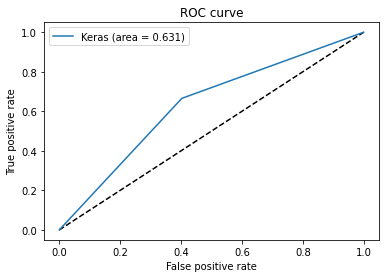

In [26]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [27]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### Gaussian Bayes

In [28]:
gnb = GaussianNB(var_smoothing=1e-6) # var-smoothing = Portion of the largest variance of all features that is added to variances for calculation stability.
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-06)

In [29]:
y_pred = gnb.predict(x_test)

In [30]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [31]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.7333333333333333
Confusion matrix
 [[216  97]
 [ 63 224]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       313
           1       0.70      0.78      0.74       287

    accuracy                           0.73       600
   macro avg       0.74      0.74      0.73       600
weighted avg       0.74      0.73      0.73       600



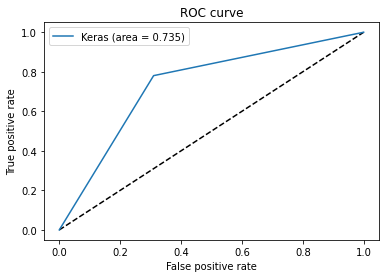

In [32]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [33]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### K Nearest Neighbor

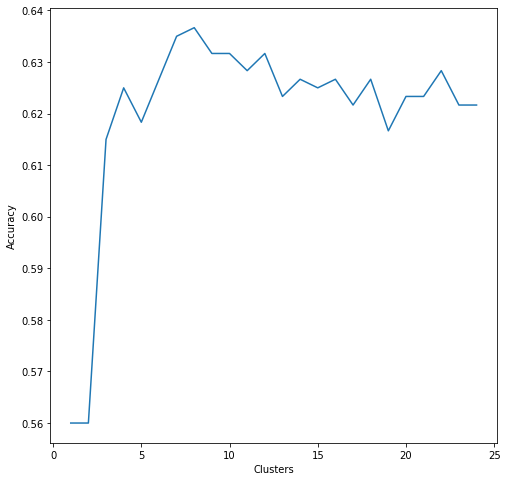

In [34]:
# find k
clusters = [] #value of k
accuracy = []
cr = []
cf = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i, weights='distance') #manhattan distance
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    clusters.append(i)
    accuracy.append(accuracy_score(y_test, y_pred))
    cr.append(classification_report(y_test, y_pred))
    cf.append(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(8,8))
plt.plot(clusters, accuracy)
plt.xlabel("Clusters")
plt.ylabel("Accuracy")
plt.show()

The value of k which gives the maximum accuracy for 2 or more epochs is to be considered. Here we select k=9,10,12 for accuracy=0.632

In [41]:
print("Accuracy score", accuracy[9])
print("Confusion matrix\n", cf[9])
print(cr[9])

Accuracy score 0.6316666666666667
Confusion matrix
 [[136 177]
 [ 44 243]]
              precision    recall  f1-score   support

           0       0.76      0.43      0.55       313
           1       0.58      0.85      0.69       287

    accuracy                           0.63       600
   macro avg       0.67      0.64      0.62       600
weighted avg       0.67      0.63      0.62       600



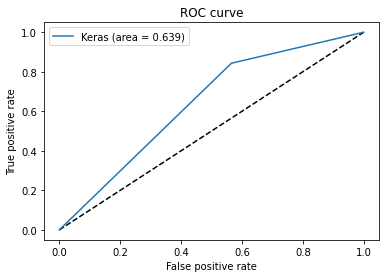

In [42]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [43]:
acc.append(accuracy[9])
auc_sc.append(auc_keras)

#### Random Forest

In [51]:
rf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_features = 'log2', random_state = 0, n_jobs=-1) # criterion for splitting into branches is gini, and taking log2 to limit max_features, speeding up processing by using all processors
rf.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=500, n_jobs=-1,
                       random_state=0)

In [52]:
y_pred = rf.predict(x_test)

In [53]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.74
Confusion matrix
 [[230  83]
 [ 73 214]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       313
           1       0.72      0.75      0.73       287

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600



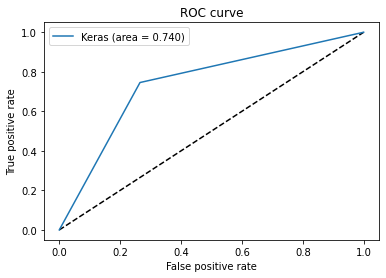

In [54]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [55]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### Performance metrics

In [56]:
perf = pd.DataFrame(list(zip(acc, auc_sc)), index = algos, columns = ['Accuracy', 'AUC Score'])

In [57]:
perf

,Accuracy,AUC Score
LogReg,0.630000,0.631475
GaussNB,0.733333,0.735292
KNN,0.631667,0.638855
RF,0.740000,0.740234


#### Observation
1. Here we observe that the accuracy and AUC scores have become nearly equal after managing the class imbalance issue. With some hyperparameter tuning in all the models, we observe increased accuracies and AUC scores in KNN and Gaussian Naive Bayes. Logistic Regression doesn't show much increase than the first notebook.
2. Performance of Random Forest has gone down since the first notebook. It could be because of overfitting due to class imbalance in the previous models. 
3. Gaussian Naive Bayes has had the most performance boost out of all. 
4. Even though KNN has increased accuracy and AUC score now, it performs the worst for class 0. 
5. Both Random Forest and Gaussian Naive Bayes have comparable performance. However we can say Gaussian Naive Bayes is better since it has had the maximum improvement in performance while Random Forest's has gone down. 